In [53]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 
                'Malic acid', 'Ash', 
                'Alcalinity of ash', 'Magnesium', 
                'Total phenols', 'Flavanoids',
                'Nonflavanoid phenols', 
                'Proanthocyanins', 
                'Color intensity', 'Hue', 
                'OD280/OD315 of diluted wines', 
                'Proline']

df_wine.head()

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
feat_labels = df_wine.columns[1:]

In [51]:
forest = RandomForestClassifier(n_estimators=100000, random_state=0, n_jobs=-1)

In [52]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100000, n_jobs=-1, oob_score=False,
            random_state=0, verbose=0, warm_start=False)

In [58]:
importances = forest.feature_importances_

In [59]:
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Color intensity                0.183348
 2) Proline                        0.157253
 3) Flavanoids                     0.151575
 4) OD280/OD315 of diluted wines   0.132434
 5) Alcohol                        0.105672
 6) Hue                            0.077395
 7) Total phenols                  0.060696
 8) Alcalinity of ash              0.033001
 9) Malic acid                     0.024912
10) Magnesium                      0.022918
11) Proanthocyanins                0.022645
12) Nonflavanoid phenols           0.014301
13) Ash                            0.013850


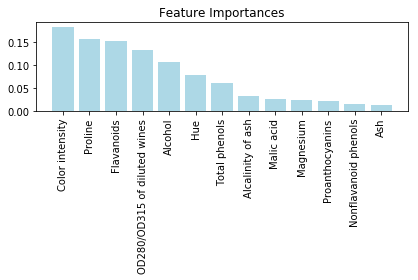

In [60]:
import matplotlib.pylab as plt

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()